In [1]:
import numpy as np

In [2]:
# 用NumPy的linalg模块中的solve函数求解线性方程组
A = np.mat("1 -2 1; 0 2 -8; -4 5 9")

In [3]:
b = np.array([0, 8, -9])

In [4]:
x = np.linalg.solve(A,b)

In [5]:
x

array([29., 16.,  3.])

In [6]:
np.dot(A,x)

matrix([[ 0.,  8., -9.]])

In [8]:
A = np.mat("3 -2;1 0")

In [9]:
# 调用eigvals函数求解特征值
np.linalg.eigvals(A)

array([2., 1.])

In [10]:
# 使用eig函数求解特征值和特征向量
np.linalg.eig(A)

(array([2., 1.]),
 matrix([[0.89442719, 0.70710678],
         [0.4472136 , 0.70710678]]))

In [15]:
eigenvalues, eigenvectors = np.linalg.eig(A)
print('eigenvalues:',eigenvalues)
print('eigenvectors:', eigenvectors)
for i in range(len(eigenvalues)):
    print('left:',np.dot(A,eigenvectors[:,i]))
    print('right:',np.dot(eigenvalues[i],eigenvectors[:,i]))

eigenvalues: [2. 1.]
eigenvectors: [[0.89442719 0.70710678]
 [0.4472136  0.70710678]]
left: [[1.78885438]
 [0.89442719]]
right: [[1.78885438]
 [0.89442719]]
left: [[0.70710678]
 [0.70710678]]
right: [[0.70710678]
 [0.70710678]]


In [16]:
# 奇异值分解
"""SVD（Singular Value Decomposition，奇异值分解）是一种因子分解运算，将一个矩阵分解
为3个矩阵的乘积。奇异值分解是前面讨论过的特征值分解的一种推广。在numpy.linalg模块
中的svd函数可以对矩阵进行奇异值分解。该函数返回3个矩阵——U、Sigma和V，其中U和V是
正交矩阵，Sigma包含输入矩阵的奇异值。"""
A = np.mat("4 11 14;8 7 -2")
print(A)

[[ 4 11 14]
 [ 8  7 -2]]


In [17]:
U, Sigma, V = np.linalg.svd(A, full_matrices=False)

In [18]:
U

matrix([[ 0.9486833 , -0.31622777],
        [ 0.31622777,  0.9486833 ]])

In [19]:
Sigma

array([18.97366596,  9.48683298])

In [20]:
V

matrix([[ 0.33333333,  0.66666667,  0.66666667],
        [ 0.66666667,  0.33333333, -0.66666667]])

In [21]:
U*np.diag(Sigma)*V

matrix([[ 4., 11., 14.],
        [ 8.,  7., -2.]])

In [22]:
# 广义逆矩阵
"""
https://zh.wikipedia.org/wiki/%E5%B9%BF%E4%B9%89%E9%80%86%E9%98%B5
广义逆 （Generalized inverse）[1]，是 线性代数中针对矩阵的一种运算。一个矩阵 A 的广义逆叫做 A 的 广义逆阵，是指具有部分逆矩阵的特性，但是不一定具有逆矩阵的所有特性的另一矩阵。假设一矩阵{\displaystyle A\in \mathbb {R} ^{n\times m}}{\displaystyle A\in \mathbb {R} ^{n\times m}} 及另一矩阵{\displaystyle A^{\mathrm {g} }\in \mathbb {R} ^{m\times n}}{\displaystyle A^{\mathrm {g} }\in \mathbb {R} ^{m\times n}}，若{\displaystyle A^{\mathrm {g} }}{\displaystyle A^{\mathrm {g} }} 满足{\displaystyle AA^{\mathrm {g} }A=A}{\displaystyle AA^{\mathrm {g} }A=A}，则{\displaystyle A^{\mathrm {g} }}{\displaystyle A^{\mathrm {g} }} 即为{\displaystyle A}A 的广义逆阵。

广义逆也称为伪逆（pseudoinverse）[2]，有些时候，伪逆特指摩尔－彭若斯广义逆。"""

A = np.mat("4 11 14;8 7 -2")
pseudoinv = np.linalg.pinv(A)

In [23]:
pseudoinv

matrix([[-0.00555556,  0.07222222],
        [ 0.02222222,  0.04444444],
        [ 0.05555556, -0.05555556]])

In [25]:
A*pseudoinv

matrix([[ 1.00000000e+00, -4.44089210e-16],
        [-1.66533454e-16,  1.00000000e+00]])

In [46]:
# 计算矩阵的行列式
A = np.mat("3 4;5 6")

In [47]:
A

matrix([[3, 4],
        [5, 6]])

In [48]:
np.linalg.det(A)

-2.0000000000000004

In [40]:
# 计算傅里叶变换
"""快速傅里叶变换
FFT（Fast Fourier Transform，快速傅里叶变换）是一种高效的计算DFT（Discrete Fourier
Transform，离散傅里叶变换）的算法。FFT算法比根据定义直接计算更快，计算复杂度为
O(NlogN) 。DFT在信号处理、图像处理、求解偏微分方程等方面都有应用。在NumPy中，有一
个名为fft的模块提供了快速傅里叶变换的功能。在这个模块中，许多函数都是成对存在的，也
就是说许多函数存在对应的逆操作函数。例如，fft和ifft函数就是其中的一对。"""
# 创建一个包含30个点的余弦波信号
x = np.linspace(0, 2 * np.pi, 30)
wave = np.cos(x)

In [41]:
x

array([0.        , 0.21666156, 0.43332312, 0.64998469, 0.86664625,
       1.08330781, 1.29996937, 1.51663094, 1.7332925 , 1.94995406,
       2.16661562, 2.38327719, 2.59993875, 2.81660031, 3.03326187,
       3.24992343, 3.466585  , 3.68324656, 3.89990812, 4.11656968,
       4.33323125, 4.54989281, 4.76655437, 4.98321593, 5.1998775 ,
       5.41653906, 5.63320062, 5.84986218, 6.06652374, 6.28318531])

In [42]:
wave

array([ 1.        ,  0.97662056,  0.90757542,  0.79609307,  0.64738628,
        0.46840844,  0.26752834,  0.05413891, -0.161782  , -0.37013816,
       -0.56118707, -0.72599549, -0.85685718, -0.94765317, -0.99413796,
       -0.99413796, -0.94765317, -0.85685718, -0.72599549, -0.56118707,
       -0.37013816, -0.161782  ,  0.05413891,  0.26752834,  0.46840844,
        0.64738628,  0.79609307,  0.90757542,  0.97662056,  1.        ])

In [43]:
# 使用fft函数对余弦波信号进行傅里叶变换
transformed = np.fft.fft(wave)

In [44]:
transformed

array([ 1.00000000e+00+0.00000000e+00j,  1.51429692e+01+1.59159020e+00j,
       -3.54637811e-01-7.53805938e-02j, -1.26172176e-01-4.09958251e-02j,
       -6.34546692e-02-2.82518389e-02j, -3.67893978e-02-2.12403687e-02j,
       -2.29208558e-02-1.66529765e-02j, -1.48053525e-02-1.33307993e-02j,
       -9.68211900e-03-1.07530825e-02j, -6.28279669e-03-8.64752777e-03j,
       -3.95826880e-03-6.85592267e-03j, -2.35015558e-03-5.27853586e-03j,
       -1.25027516e-03-3.84795127e-03j, -5.34677680e-04-2.51546071e-03j,
       -1.30679679e-04-1.24333409e-03j,  5.64218811e-16-3.53883589e-16j,
       -1.30679679e-04+1.24333409e-03j, -5.34677680e-04+2.51546071e-03j,
       -1.25027516e-03+3.84795127e-03j, -2.35015558e-03+5.27853586e-03j,
       -3.95826880e-03+6.85592267e-03j, -6.28279669e-03+8.64752777e-03j,
       -9.68211900e-03+1.07530825e-02j, -1.48053525e-02+1.33307993e-02j,
       -2.29208558e-02+1.66529765e-02j, -3.67893978e-02+2.12403687e-02j,
       -6.34546692e-02+2.82518389e-02j, -1.26172176

In [50]:
# 对变换后的结果应用ifft函数，应该可以近似地还原初始信号。
np.all(np.abs(np.fft.ifft(transformed)-wave)< 10**-9)

True

In [51]:
import matplotlib.pyplot as plt

D:\workApp\anaconda\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


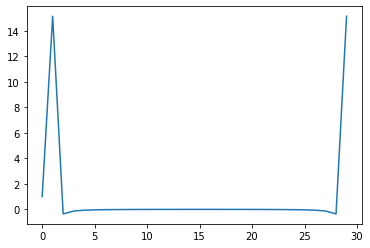

In [52]:
plt.plot(transformed)
plt.show()

In [53]:
# 使用fftshift函数进行移频操作
shifted = np.fft.fftshift(transformed)


In [54]:
np.all((np.fft.ifftshift(shifted)-transformed)< 10**-7)

True

D:\workApp\anaconda\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
D:\workApp\anaconda\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


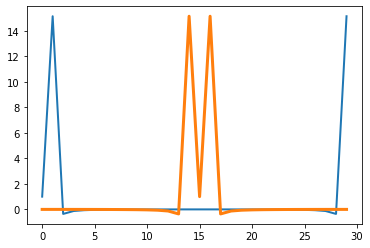

In [55]:
plt.plot(transformed, lw=2)
plt.plot(shifted, lw=3)
plt.show()

In [56]:
"""随机数在蒙特卡罗方法（Monto Carlo method）、随机积分等很多方面都有应用。真随机数的
产生很困难，因此在实际应用中我们通常使用伪随机数。在大部分应用场景下，伪随机数已经足
够随机，当然一些特殊应用除外。有关随机数的函数可以在NumPy的random模块中找到。随机
数发生器的核心算法是基于马特赛特旋转演算法（Mersenne Twister algorithm）的。随机数可以
从离散分布或连续分布中产生。分布函数有一个可选的参数size，用于指定需要产生的随机数
的数量。该参数允许设置为一个整数或元组，生成的随机数将填满指定形状的数组。支持的离散
分布包括几何分布、超几何分布和二项分布等。"""

'随机数在蒙特卡罗方法（Monto Carlo method）、随机积分等很多方面都有应用。真随机数的\n产生很困难，因此在实际应用中我们通常使用伪随机数。在大部分应用场景下，伪随机数已经足\n够随机，当然一些特殊应用除外。有关随机数的函数可以在NumPy的random模块中找到。随机\n数发生器的核心算法是基于马特赛特旋转演算法（Mersenne Twister algorithm）的。随机数可以\n从离散分布或连续分布中产生。分布函数有一个可选的参数size，用于指定需要产生的随机数\n的数量。该参数允许设置为一个整数或元组，生成的随机数将填满指定形状的数组。支持的离散\n分布包括几何分布、超几何分布和二项分布等。'

In [57]:
"""二项分布是n个独立重复的是/非试验中成功次数的离散概率分布，这些概率是固定不变的，
与试验结果无关。
设想你来到了一个17世纪的赌场，正在对一个硬币赌博游戏下8份赌注。每一轮抛9枚硬币，
如果少于5枚硬币正面朝上，你将损失8份赌注中的1份；否则，你将赢得1份赌注。我们来模拟
一下赌博的过程，初始资本为1000份赌注。为此，我们需要使用random模块中的binomial
函数。"""
cash = np.zeros(10000)

In [58]:
cash

array([0., 0., 0., ..., 0., 0., 0.])

In [59]:
cash[0] = 1000

In [60]:
outcome = np.random.binomial(9,0.5, size=len(cash))

In [61]:
outcome

array([6, 2, 4, ..., 0, 6, 5])

In [62]:
len(outcome)

10000

In [65]:
for i in range(len(cash)):
    if outcome[i] < 5:
        cash[i] = cash[i-1] - 1
    elif outcome[i] < 10:
        cash[i] = cash[i-1] + 1
    else:
        raise AssertionError("UnExcepted outcome "+ outcome)
print(outcome.min(), outcome.max())

0 9


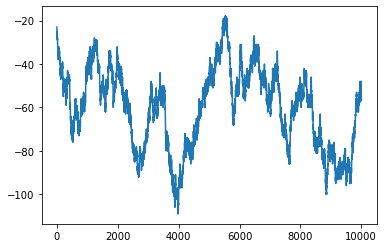

In [66]:
plt.plot(np.arange(len(cash)), cash)
plt.show()

In [67]:
"""超几何分布（hypergeometric distribution）是一种离散概率分布，它描述的是一个罐子里有
两种物件，无放回地从中抽取指定数量的物件后，抽出指定种类物件的数量。NumPy random模
块中的hypergeometric函数可以模拟这种分布。"""

'超几何分布（hypergeometric distribution）是一种离散概率分布，它描述的是一个罐子里有\n两种物件，无放回地从中抽取指定数量的物件后，抽出指定种类物件的数量。NumPy random模\n块中的hypergeometric函数可以模拟这种分布。'

In [68]:
"""使用hypergeometric函数初始化游戏的结果矩阵。该函数的第一个参数为罐中普通球
的数量，第二个参数为“倒霉球”的数量，第三个参数为每次采样（摸球）的数量。"""
points = np.zeros(100)
outcomes = np.random.hypergeometric(25,1,3, size=len(points))

In [69]:
for i in range(len(points)):
    if outcomes[i] == 3:
        points[i] = points[i-1] + 1
    elif outcomes[i] == 2:
        points[i] = points[i-1] - 6
    else:
        print(outcomes[i])

In [70]:
outcomes

array([3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3])

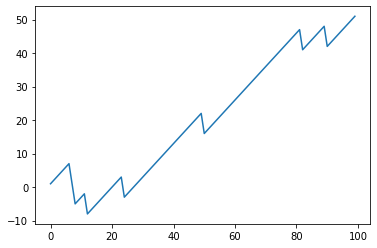

In [74]:
plt.plot(np.arange(len(points)), points)
plt.show()

In [75]:
"""连续分布可以用PDF（Probability Density Function，概率密度函数）来描述。随机变量落在某
一区间内的概率等于概率密度函数在该区间的曲线下方的面积。NumPy的random模块中有一系列
连续分布的函数——beta、chisquare、exponential、f、gamma、gumbel、laplace、lognormal、
logistic、multivariate_normal、noncentral_chisquare、noncentral_f、normal等。"""

'连续分布可以用PDF（Probability Density Function，概率密度函数）来描述。随机变量落在某\n一区间内的概率等于概率密度函数在该区间的曲线下方的面积。NumPy的random模块中有一系列\n连续分布的函数——beta、chisquare、exponential、f、gamma、gumbel、laplace、lognormal、\nlogistic、multivariate_normal、noncentral_chisquare、noncentral_f、normal等。'

In [76]:
# 随机数可以从正态分布中产生，它们的直方图能够直观地刻画正态分布
N = 10000
normal_values = np.random.normal(size=N)

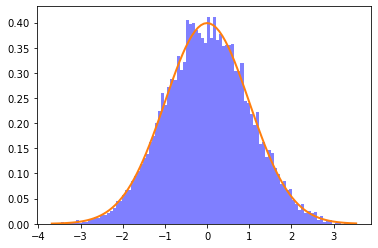

In [97]:
num_bins = 50
n, bins, patches = plt.hist(normal_values,int(np.sqrt(N)),density=True, facecolor="blue",alpha=0.5,lw=1)
sigma = 1
mu = 0
plt.plot(bins, 1/(sigma * np.sqrt(2*np.pi))*np.exp(-(bins - mu)**2/(2*sigma**2)),lw=2)
plt.show()

In [98]:
"""对数正态分布（lognormal distribution） 是自然对数服从正态分布的任意随机变量的概率分
布。NumPy random模块中的lognormal函数模拟了这个分布。"""
N = 10000
lognormal_values = np.random.lognormal(size=N)

In [99]:
lognormal_values

array([0.2488356 , 1.96999544, 0.96078575, ..., 1.66081742, 0.90002453,
       0.57568191])

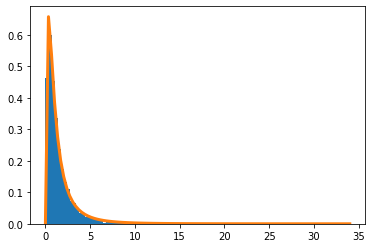

In [105]:
dummy, bins, dummy = plt.hist(lognormal_values,int(np.sqrt(N)), density=True, lw=1)
sigma = 1
mu = 0
x = np.linspace(min(bins),max(bins),len(bins))
pdf = np.exp(-(np.log(x) - mu)**2/(2*sigma**2))/(x*sigma*np.sqrt(2*np.pi))
plt.plot(x,pdf,lw=3)
plt.show()

In [106]:
"""NumPy提供了多种排序函数，如下所示：
 sort函数返回排序后的数组；
 lexsort函数根据键值的字典序进行排序；
 argsort函数返回输入数组排序后的下标；
 ndarray类的sort方法可对数组进行原地排序；
 msort函数沿着第一个轴排序；
 sort_complex函数对复数按照先实部后虚部的顺序进行排序。
在上面的列表中，argsort和sort函数可用来对NumPy数组类型进行排序。"""

'NumPy提供了多种排序函数，如下所示：\n\uf071 sort函数返回排序后的数组；\n\uf071 lexsort函数根据键值的字典序进行排序；\n\uf071 argsort函数返回输入数组排序后的下标；\n\uf071 ndarray类的sort方法可对数组进行原地排序；\n\uf071 msort函数沿着第一个轴排序；\n\uf071 sort_complex函数对复数按照先实部后虚部的顺序进行排序。\n在上面的列表中，argsort和sort函数可用来对NumPy数组类型进行排序。'

In [131]:
import datetime
def datestr2num(s):
    return datetime.datetime.strptime(s.decode("ascii"),"%d-%m-%Y").toordinal()

In [132]:
dates, closes = np.loadtxt("AAPL.csv", delimiter=',',usecols=(1,6),converters={1:datestr2num}, unpack=True)

In [133]:
dates

array([734165., 734168., 734169., 734170., 734171., 734172., 734175.,
       734176., 734177., 734178., 734179., 734182., 734183., 734184.,
       734185., 734186., 734190., 734191., 734192., 734193., 734196.,
       734197., 734198., 734199., 734200., 734203., 734204., 734205.,
       734206., 734207.])

In [134]:
indices = np.lexsort((dates,closes))

In [135]:
indices

array([ 0, 16,  1, 17, 18,  4,  3,  2,  5, 28, 19, 21, 15,  6, 29, 22, 27,
       20,  9,  7, 25, 26, 10,  8, 14, 11, 23, 12, 24, 13], dtype=int64)

In [150]:
print(["%s %s"%(datetime.date.fromordinal(int(dates[i])), closes[i]) for i in indices])

['2011-01-28 336.1', '2011-02-22 338.61', '2011-01-31 339.32', '2011-02-23 342.62', '2011-02-24 342.88', '2011-02-03 343.44', '2011-02-02 344.32', '2011-02-01 345.03', '2011-02-04 346.5', '2011-03-10 346.67', '2011-02-25 348.16', '2011-03-01 349.31', '2011-02-18 350.56', '2011-02-07 351.88', '2011-03-11 351.99', '2011-03-02 352.12', '2011-03-09 352.47', '2011-02-28 353.21', '2011-02-10 354.54', '2011-02-08 355.2', '2011-03-07 355.36', '2011-03-08 355.76', '2011-02-11 356.85', '2011-02-09 358.16', '2011-02-17 358.3', '2011-02-14 359.18', '2011-03-03 359.56', '2011-02-15 359.9', '2011-03-04 360.0', '2011-02-16 363.13']


In [152]:
"""复数包含实数部分和虚数部分。如同在前面的章节中提到的，NumPy中有专门的复数类型，
使用两个浮点数来表示复数。这些复数可以使用NumPy的sort_complex函数进行排序。该函数
按照先实部后虚部的顺序排序。"""

'复数包含实数部分和虚数部分。如同在前面的章节中提到的，NumPy中有专门的复数类型，\n使用两个浮点数来表示复数。这些复数可以使用NumPy的sort_complex函数进行排序。该函数\n按照先实部后虚部的顺序排序。'

In [153]:
np.random.seed(42)

In [154]:
complex_numbers = np.random.random(5) + 1j*np.random.random(5)

In [155]:
complex_numbers

array([0.37454012+0.15599452j, 0.95071431+0.05808361j,
       0.73199394+0.86617615j, 0.59865848+0.60111501j,
       0.15601864+0.70807258j])

In [156]:
np.sort_complex(complex_numbers)

array([0.15601864+0.70807258j, 0.37454012+0.15599452j,
       0.59865848+0.60111501j, 0.73199394+0.86617615j,
       0.95071431+0.05808361j])

In [157]:
a= np.array([2,4,8])

In [158]:
np.argmax(a)

2

In [159]:
a = np.array([[1,2,3,4],[4,5,6,7]])

In [160]:
np.argwhere(a<=4)

array([[0, 0],
       [0, 1],
       [0, 2],
       [0, 3],
       [1, 0]], dtype=int64)

In [161]:
a = np.arange(5)

In [162]:
indices = np.searchsorted(a,[-2,7])

In [163]:
indices

array([0, 5], dtype=int64)

In [164]:
print(indices)

[0 5]


In [165]:
a

array([0, 1, 2, 3, 4])

In [166]:
np.insert(a, indices, [-2,7])

array([-2,  0,  1,  2,  3,  4,  7])

In [167]:
a = np.arange(7)

In [168]:
condition = (a%2)==0

In [169]:
condition

array([ True, False,  True, False,  True, False,  True])

In [170]:
np.extract(condition, a)

array([0, 2, 4, 6])

In [171]:
np.nonzero(a)

(array([1, 2, 3, 4, 5, 6], dtype=int64),)